In [1]:
from google.cloud import vision
import numpy as np
import os

import matplotlib.pyplot as plt

from skimage.transform import rotate
from skimage.draw import polygon


from ML_helper import *
from corrections import *
from image_reading import * 
from handling import *
from preprocessing import * 

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../guppies-test-4c48569421d8.json"
client = vision.ImageAnnotatorClient()

c:\Users\newc6448\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
random_files = ListAvaliableFiles('guppy_images', prefix='Manually_Labelled/New', verbose=False)
np.random.shuffle(random_files)

F pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: F upper height: 364 lower height: 260
U pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:1
character: U upper height: 363 lower height: 259
L pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:2
character: L upper height: 362 lower height: 258
2 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:0
character: 2 upper height: 551 lower height: 369
N pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:1
character: N upper height: 547 lower height: 365
3 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:2
character: 3 upper height: 543 lower height: 362
0 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:3
character: 0 upper height: 540 lower height: 359
1 pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:0
character: 1 upper height: 699 lower height: 591
1 pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:1
character: 1 upper height: 697 lower height: 589
/ pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:2
character

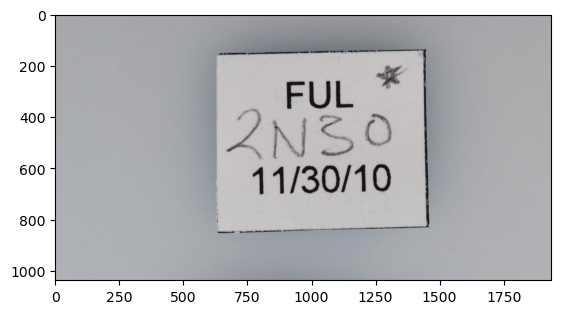

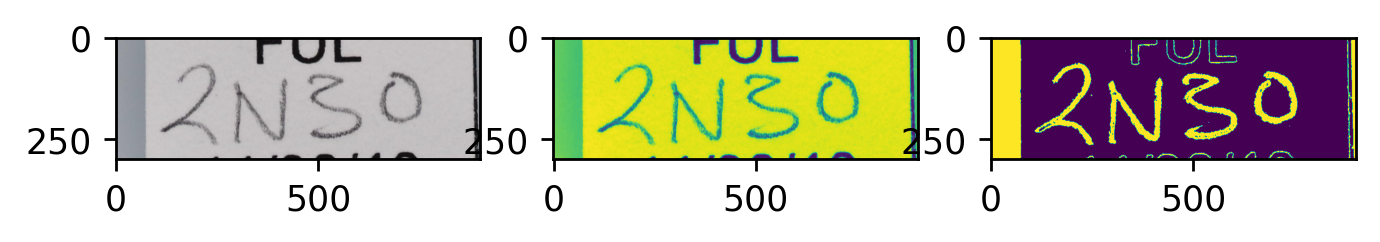

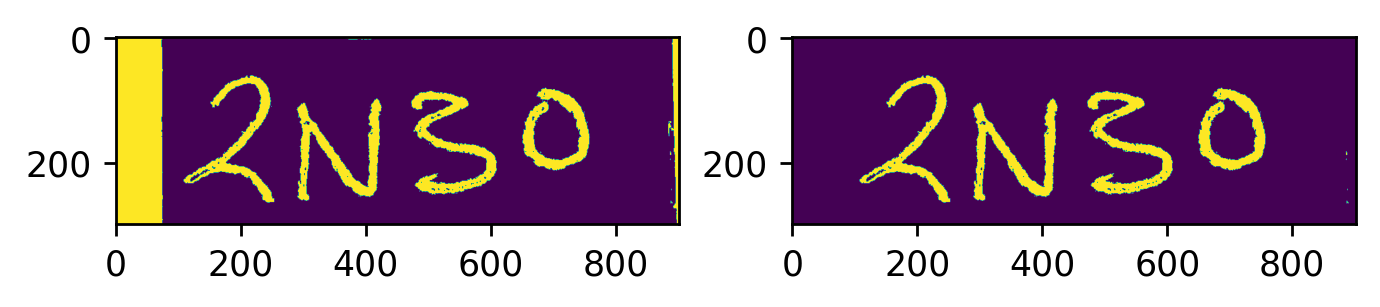

In [3]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[10])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes)

padx = 100
pady = 60
# Reduce the image to just the ID
reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

# Mask and remove for final image
masked_image = mask_and_remove(reduced_frame, verbose = True)

# Remove deltas
final_image = remove_deltas(masked_image, width=10, padx=padx, pady=pady, verbose = True)

print(output_string)

(upper thresh, lower_thresh) = (180.85, 13.00)


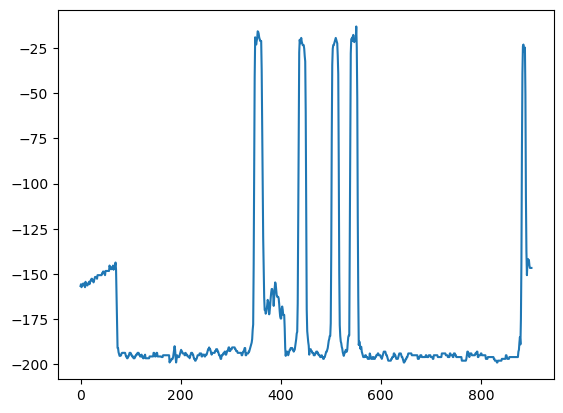

In [4]:
# Average out the RGB axis
averaged_frame = np.mean(reduced_frame,axis=2)


# White background masking
hist = np.histogram(averaged_frame, bins=100)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])

thresh_val = np.argmax(hist[0] > np.max(hist[0]) * 0.2)
upper_thresh = centers[thresh_val] * 0.95

# Dark writing masking. Mask based on central row of frame
frame_shape = np.shape(averaged_frame)
row1 = -averaged_frame[2 * frame_shape[0] // 5][100:-100]
row2 = -averaged_frame[3 * frame_shape[0] // 5][100:-100]
rows = np.concatenate((row1, row2))
rows = row2 = -averaged_frame[1]
row_mean = np.mean(rows)
row_max = np.max(rows)
row_min = np.min(rows)
peaks,_ = scipy.signal.find_peaks(rows, height = row_mean + ((row_max - row_min) / 5), distance=4)

values = []
for peak in peaks:
    values.append(-rows[peak])

sorted_values = np.sort(values)

lower_thresh = sorted_values[0] * 1

averaged_frame[averaged_frame>upper_thresh] = 0
averaged_frame[averaged_frame<lower_thresh] = 0
averaged_frame[averaged_frame!=0] = 255

plt.plot(rows)
print('(upper thresh, lower_thresh) = (%.2f, %.2f)' %(upper_thresh, lower_thresh))

190.0768333333333

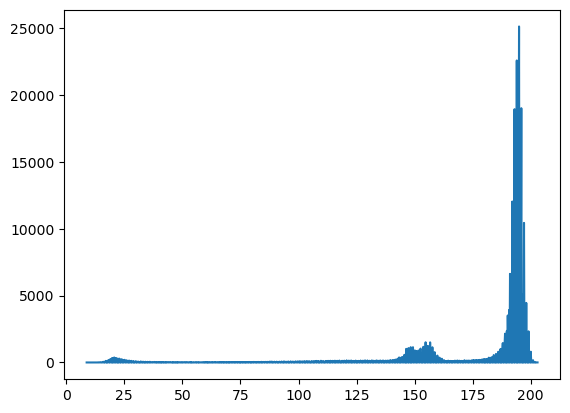

In [5]:
averaged_frame = np.mean(reduced_frame,axis=2)
hist = np.histogram(averaged_frame, bins=1000)
centers = 0.5*(hist[1][1:]+ hist[1][:-1])
plt.plot(centers, hist[0])

thresh = np.argmax(hist[0] > np.max(hist[0]) * 0.1)
centers[thresh]

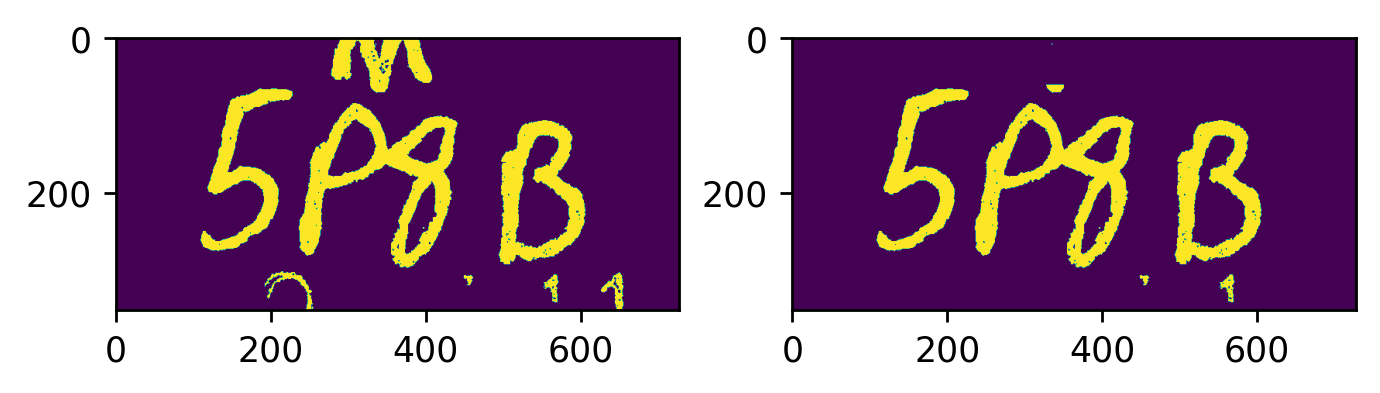

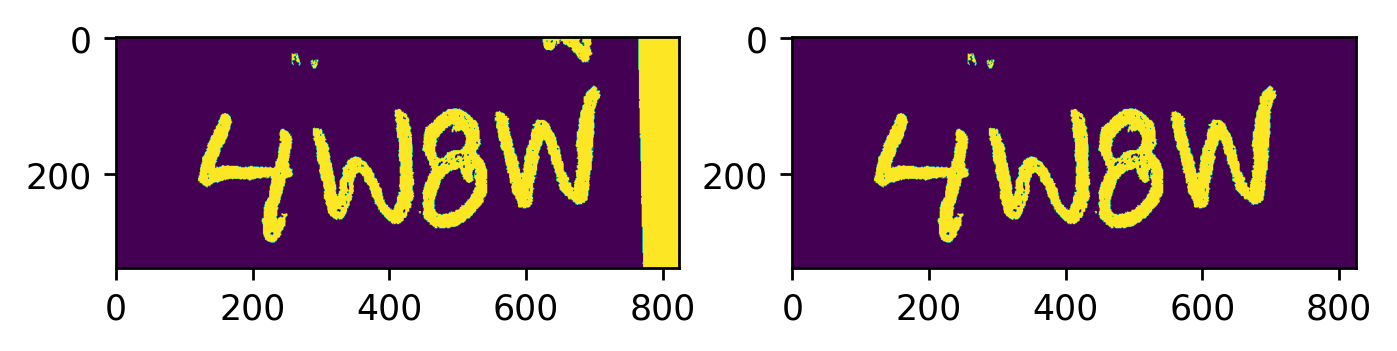

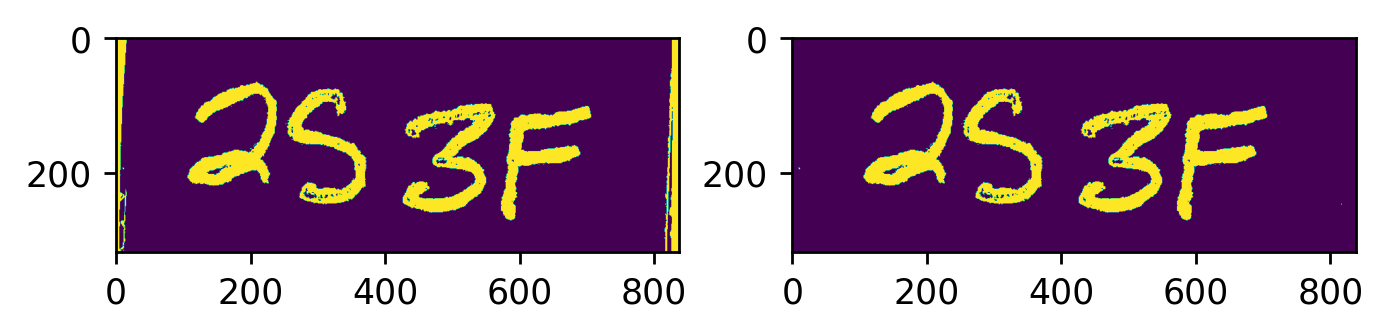

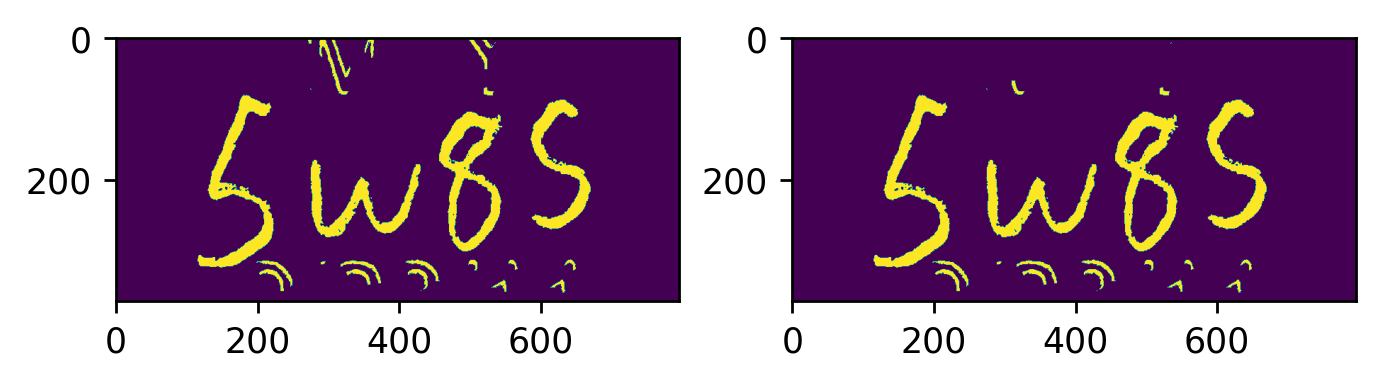

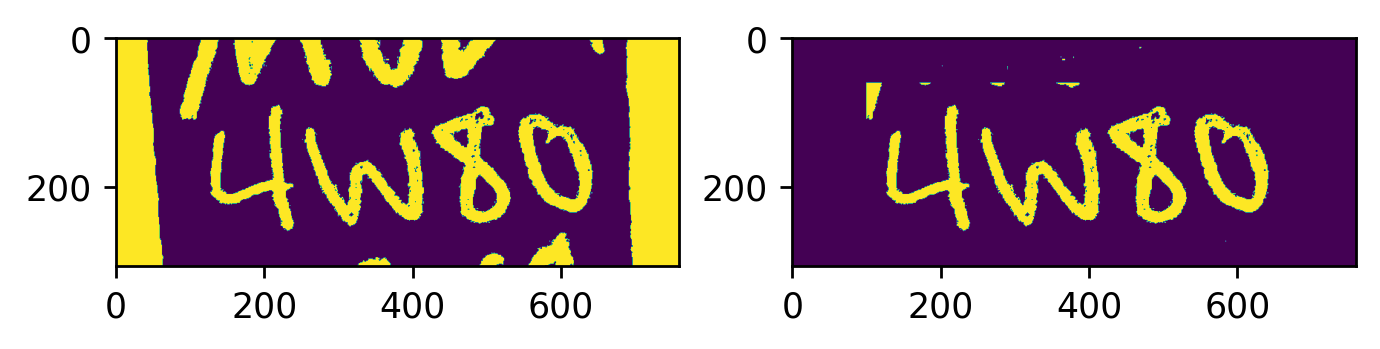

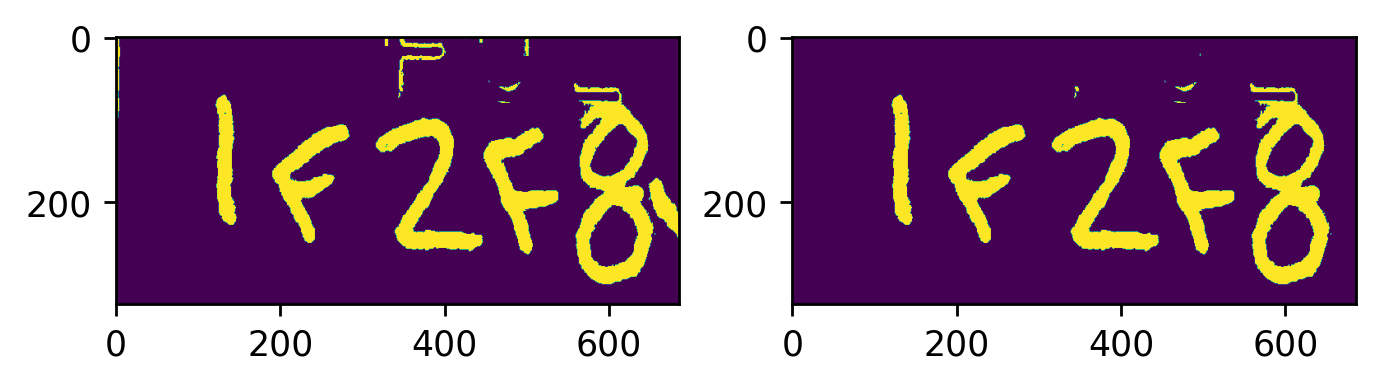

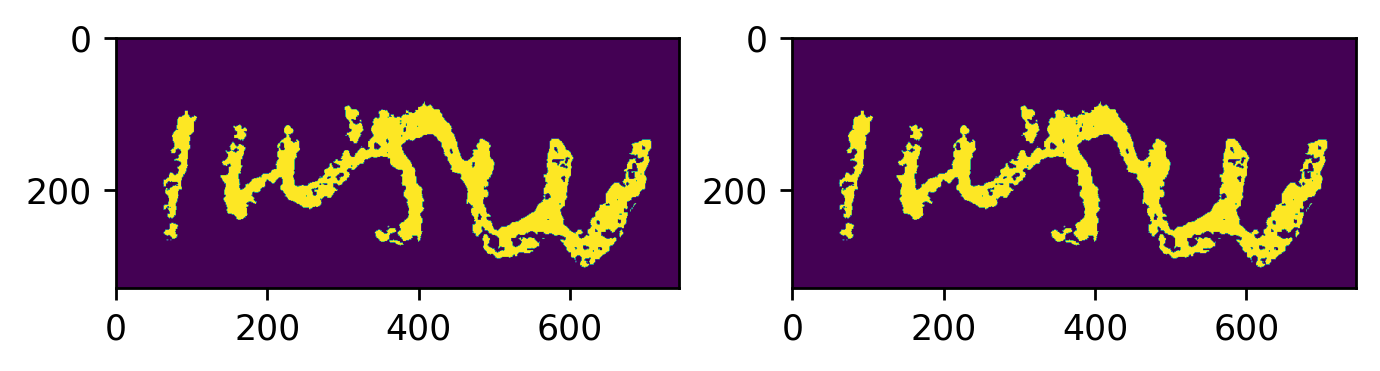

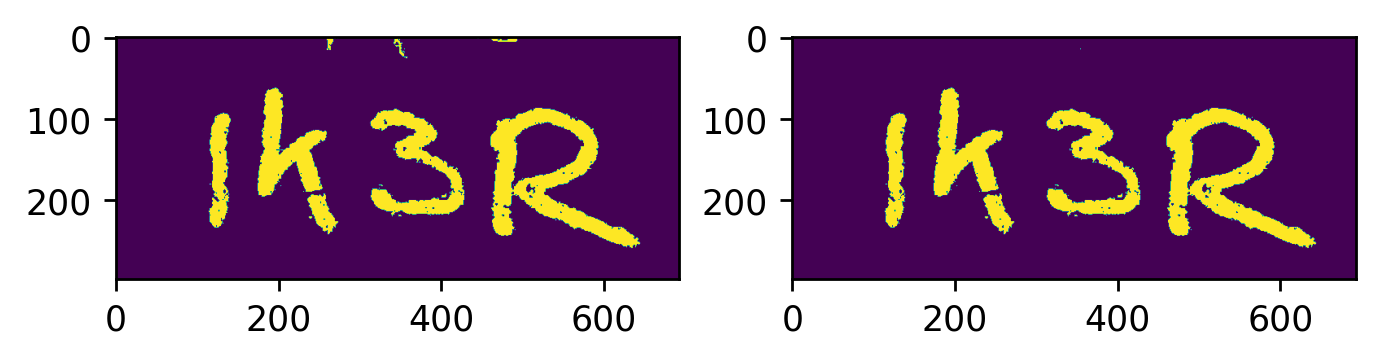

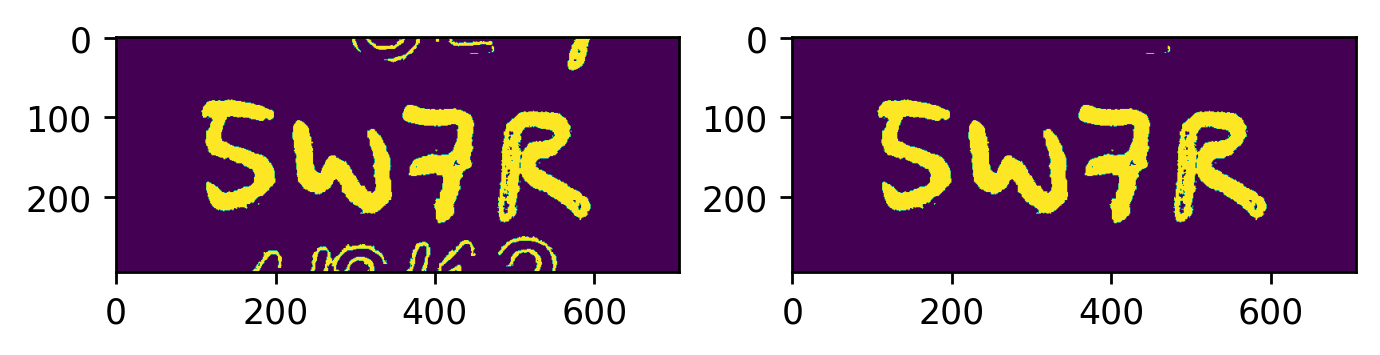

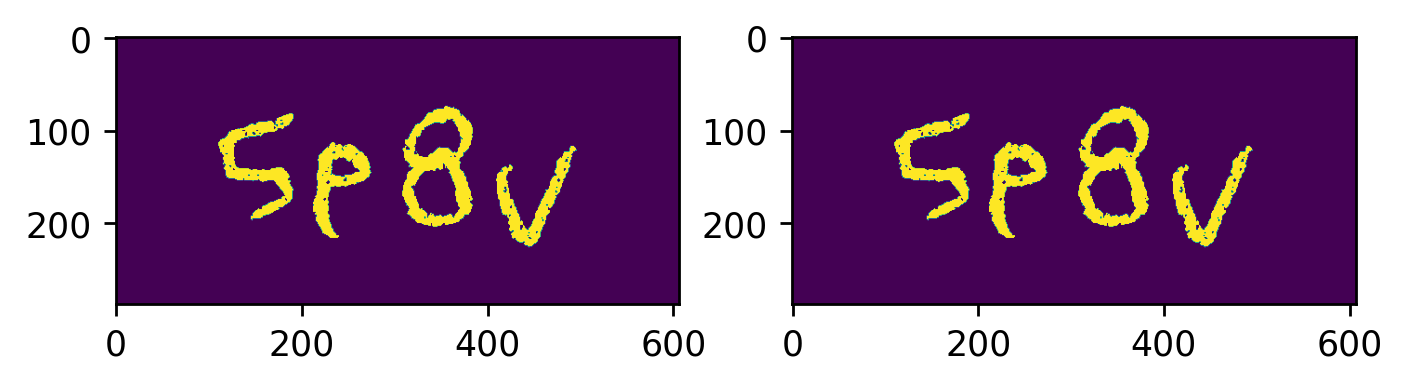

In [6]:
%matplotlib inline
padx = 100
pady = 60
for i in range(10):
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[i])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=100, pady=80)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        final_image = remove_deltas(masked_image, width=10, padx=padx, pady=pady, verbose = True)
    
    except:
        pass

M pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:0
character: M upper height: 531 lower height: 421
U pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:1
character: U upper height: 534 lower height: 425
L pageno:0 blockno:0 paragraphno:0 wordno:0 symbolno:2
character: L upper height: 537 lower height: 428
4 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:0
character: 4 upper height: 729 lower height: 494
N pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:1
character: N upper height: 738 lower height: 504
8 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:2
character: 8 upper height: 749 lower height: 515
5 pageno:0 blockno:0 paragraphno:1 wordno:0 symbolno:3
character: 5 upper height: 761 lower height: 526
1 pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:0
character: 1 upper height: 853 lower height: 746
0 pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:1
character: 0 upper height: 855 lower height: 748
/ pageno:0 blockno:0 paragraphno:2 wordno:0 symbolno:2
character

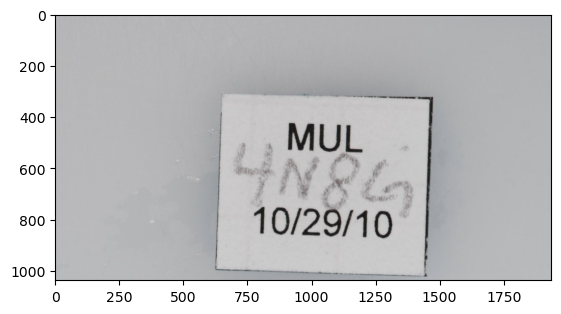

In [7]:
# Collect image from bucket
image_in_bytes = RetreiveImage(random_files[12])

# Read image and return initial output, frame and identity character boxes
output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=True)

# Collect character boxes into a singe ID box.
identity_box = combine_boxes(character_boxes)

In [8]:
client = vision.ImageAnnotatorClient()
fig,ax = plt.subplots(10,10, figsize=(20,20))
padx = 100
pady = 60
for i in range(100):
    try:
        # Collect image from bucket
        image_in_bytes = RetreiveImage(random_files[100 + i])

        # Read image and return initial output, frame and identity character boxes
        output_string, frame, character_boxes = GetImageAndParaBox(image_in_bytes, client, verbose=False)

        # Collect character boxes into a singe ID box.
        identity_box = combine_boxes(character_boxes)

        # Reduce the image to just the ID
        reduced_frame = reduce_image(frame, identity_box, padx=padx, pady=pady)

        # Mask and remove for final image
        masked_image = mask_and_remove(reduced_frame, verbose = False)

        # Remove deltas
        final_image = remove_deltas(masked_image, width=10, padx=padx, pady=pady, verbose = False)

        ax[i // 10, i % 10].imshow(final_image)
        ax[i // 10, i % 10].set_title('index %i' %i)

    except:
        pass

In [ ]:
Energy = 2
gamma = ( (Energy * 1.6e-13) / (9.11e-31 * (3e8)**2) ) + 1
beta2 = 1 - (1 / gamma**2)    #beta squared
S = beta2 * gamma * (0.01/2)**(1/3)
W2 = S * (1 + S)**(-5/2)
u = (gamma**2 - 1)**0.5
v = u / gamma
Beam_Momentum = u * 9.11e-31 * 3e8
Beam_Momentum

1.3117994426655995e-21